# Video: Random Distributions

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Random Distributions
--------------------

**Uniform Distribution**

More discussion about different random distributions.  In the lecture notebooks for this module we discuss two different 
random probability distributions, a uniform distribution and the standard normal or gaussian distribution.  
It is very important, in order for you to understand how Monte Carlo simulations work specifically, and how 
statistical processes work in general, that you understand what a random distribution is, and what things 
like a uniform and gaussian distribution do in the context of generating random events.

A uniform distribution simply means that the probability of the outcomes of an event are equal.  For instance, the simplest
example of a uniform distribution is when we only have 2 possible outcomes, like when flipping a coin.  Each
coin flip is an event (or a trial or an experiment).  The possible outcomes are HEADS or TAILS.  And for a fair
coin, we expect the probability of getting a HEADS to be equal to the probability of getting a TAILS.

The random.randint() returns random integers with equally likely probability (a uniform distribution).  So we
can simulate a fair coin like this:

In [2]:
HEADS,TAILS = 1,2
coin_toss = random.randint(HEADS, TAILS)
if coin_toss == HEADS:
    print( "Got Heads" ) 
else:
    print( "Got Tails" ) 

Got Heads


If the outcomes are truly equally likely (we have a true uniform distribution), then if we flip the coin many times, we
expect to see about an equal number of HEADS and TAILS

In [3]:
num_heads = 0
num_tails = 0
N = 10000 # number of trials or experiments to run

for exp in range(N):
    coin_toss = random.randint(HEADS, TAILS)
    if coin_toss == HEADS:
        num_heads += 1
    if coin_toss == TAILS:
        num_tails += 1
        
print( "Ran", N, ", experiments:" ) 
print( "  number of Heads:", num_heads ) 
print( "  number of Tails:", num_tails ) 

('Ran', 10000, ', experiments:')
('  number of Heads:', 4987)
('  number of Tails:', 5013)


Each time we run the previous simulation, we will not get exactly 500 HEADS and 500 TAILS, because the coin toss really is 
random here, so we expect some variation.  However, the values will be close to 500 for each, and the larger the number
of experiments, the more we expect to see a uniform distribution, e.g. equal numbers of heads and tails (more on this later).

In the lecture notebooks, we visualized these results as bar graphs and histograms.  For example, we can plot bars for our
HEADS and TAILS  results to visually represent the number of each outcome we got from our previous experiment.

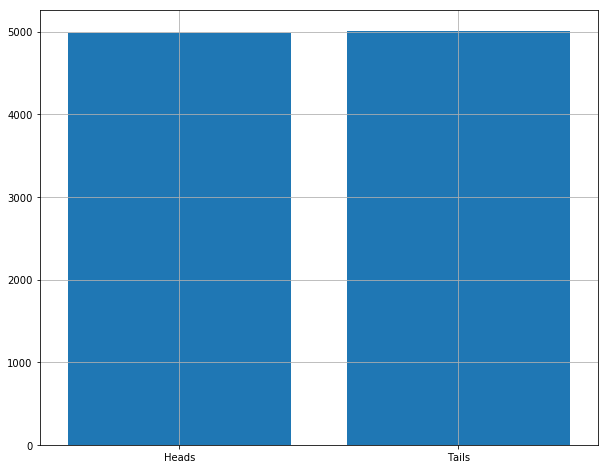

In [4]:
plt.figure(figsize=(10,8))
plt.bar([HEADS, TAILS], [num_heads, num_tails])
plt.xticks([1, 2], ['Heads', 'Tails'])
plt.xlim([0.5, 2.5])
plt.grid()

A uniform distribution means that all outcomes are equally likely.  So if we have 6 possible outcomes (as in throwing a dice),
and all 6 are equally likely, then we expect if we run many experiments we will get approximately $1/6$ of each of the
possible outcomes.  This is what uniform means, each outcome is equally likely.  We showed an example of the dice
uniform probability in the lecture notebooks

In [5]:
num_pips = [0, 0, 0, 0, 0, 0] # number of 1pips we see, 2pips, ... 6pips
N = 100000 # number of dice toss experiments to perform

for exp in range(N):
    dice_roll = random.randint(1, 6)
    num_pips[dice_roll-1] += 1 # we subtract 1 because python arrays are 0 indexed, so 1 pips are recorded at index 0
        
print( "Ran", N, ", experiments:" ) 
for pip, count in enumerate(num_pips):
    print( "  Num ", pip+1, "pips seen", count ) 

('Ran', 100000, ', experiments:')
('  Num ', 1, 'pips seen', 16676)
('  Num ', 2, 'pips seen', 16679)
('  Num ', 3, 'pips seen', 16720)
('  Num ', 4, 'pips seen', 16429)
('  Num ', 5, 'pips seen', 16698)
('  Num ', 6, 'pips seen', 16798)


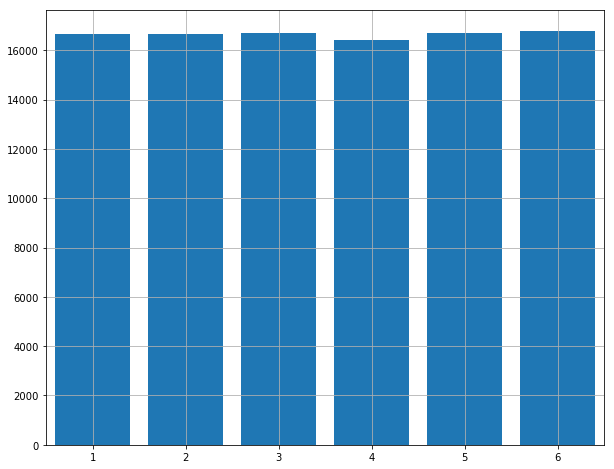

In [6]:
plt.figure(figsize=(10,8))
plt.bar(range(1,7), num_pips)
plt.xticks([1, 2, 3, 4, 5, 6], ['1', '2', '3', '4', '5', '6'])
plt.xlim([0.5, 6.5])
plt.grid()

When we generate a floating point number with a uniform distribution, we mean that there is an equal probability 
of generating any floating point number within the range we are sampling numbers from.  But, there are
infinitely many floating point numbers between, for example, 0.0 and 1.0, you might say.  This is true, 
but the idea is still the same.  If we are generating a floating point number with equal probability,
then any of the infinite floating point numbers is equally likely to be selected by a uniform
distribution selection process.

The `random.uniform()` and `np.random.uniform()` functions, as we showed in the lecture notebooks, do just this, the
generate a random floating point number with equal probability over the range from 0.0 to 1.0.

If we want to visualize the result, as a bar graph, we no longer have a finite number of outcomes (like 2 or 6
outcomes in the previous example).  But we can instead create equal sized ranges and count the number of
outcomes that were within that range.  This is basically what a histogram plot does, it divides a continuous
range up into some number of discrete sized bins, counts the outcomes that occurred within that bin range, then
plots a bar chart for the resulting bin counts. 

For example, if we generate uniform random floating point numbers in the range from 0.0 to 1.0, we can see if
the distribution was uniform (equally probably) by, say, creating 10 bins.  The first bin will count all the
results in the range from 0.0 to 0.1, the next from 0.1 to 0.2, etc.  Since we divide the continuous, infinte
range up into 10 bins, we expect each bin to contain around $1/10$ of the outcomes for any given N trials or 
experiments.  Lets try that:

In [7]:
# run the experiments
random_floats = [] # we will hold all random floats generated here
N = 100000 # number of  experiments to perform

for exp in range(N):
    r = random.random() # by default generate a number in range 0.0 to 1.0 with uniform probability
    random_floats.append(r)

# bin the results by hand, as an example of what a histogram actually does
bins = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # 10 bins, to hold counts of floats in ranges 0.0-0.1, 0.1-0.2, ..., 0.9-1.0
sum = 0
for r in random_floats:
    for bin in range(10):
        lower = bin * 0.1 # lower part of range to test for
        upper = (bin+1) * 0.1 # upper part of range to test for
        #print( r, lower, upper ) 
        if r >= lower and r < upper:
            bins[bin] += 1
            sum += 1
print( "sum = ", sum ) 

# print( out the results ) 
print( "Ran", N, ", experiments:" ) 
for bin, count in enumerate(bins):
    lower = bin * 0.1
    upper = (bin+1) * 0.1
    print( "  bin", lower, '-', upper, ':', count ) 

('sum = ', 100000)
('Ran', 100000, ', experiments:')
('  bin', 0.0, '-', 0.1, ':', 10051)
('  bin', 0.1, '-', 0.2, ':', 9989)
('  bin', 0.2, '-', 0.30000000000000004, ':', 9935)
('  bin', 0.30000000000000004, '-', 0.4, ':', 9882)
('  bin', 0.4, '-', 0.5, ':', 10167)
('  bin', 0.5, '-', 0.6000000000000001, ':', 9968)
('  bin', 0.6000000000000001, '-', 0.7000000000000001, ':', 9974)
('  bin', 0.7000000000000001, '-', 0.8, ':', 10138)
('  bin', 0.8, '-', 0.9, ':', 9888)
('  bin', 0.9, '-', 1.0, ':', 10008)


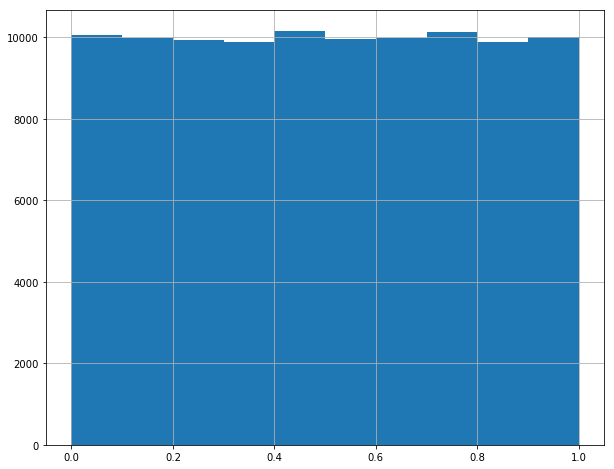

In [8]:
# use the histogram plotting function, to make a histogram/bar graph of the bins
plt.figure(figsize=(10,8))
plt.hist(random_floats, bins=10, range=(0.0, 1.0))
plt.grid()

In the lecture notebooks, I showed another way of visualizing a uniform distribution, by plotting 2 numbers drawn from
uniform equal probability distributions, and plotting them as x,y values.  Here I recreate that visualization:

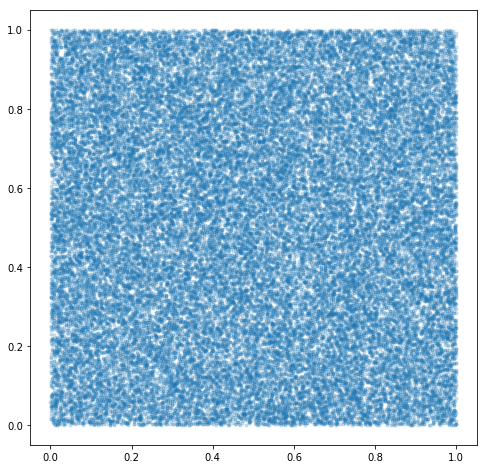

In [9]:
d = np.random.rand(50000,2)
plt.figure(figsize=(8,8))
plt.plot(d[:,0], d[:,1], '.', alpha=0.2)

Here I created 5000 rows, each row with 2 columns, or 2 dimensions.  I use column 0 for the x axis values, and column
1 for the y axis values.  Mapping the columns to dimensions like this, and using colunn 0 as x, column 1 as y, column 2
as z is a fairly standard thing to do to visualize points in 2 or 3 dimensional space.

What you are supposed to see, here, is another visual representation of what a uniform distribution, or equally probable
distribution, is.  Here since the x value is equally likely to be anywhere along the x axis from 0.0 to 1.0, and
likewise the y value will be equally probable to be any of the infinite numbers between 0.0 and 1.0, we expect
to see all points in the unit square to have a random draw somewhere in their vicinity.  Or in other words, we expect the
whole unit square space to be filled up, as we see.  We expect the points to be distributed randomly, so it should
look like random snow on a television screen.  If we saw a pattern, like a straight line, we would be 
suspicious that something not random was occurring.  Likewise, if we saw some holes where points did not appear
or some areas that appeard to have denser concentrations of points, we would suspect that the distribution
wasn't uniform, that some points were more likely to be generated than others.

But we don't, this is a good looking uniform distribution.  The space looks fairly evenly covered, and we don't detect
any patterns, holes or denser areas in general.  As mentioned in the lecture notebook, you can try this with
larger numbers of points/experiments to convince yourself.

**Normal or Gaussian Distribution**

As mentioned in the lecture notebooks, there are many different useful random distributions besides an equally probably
uniform distribution.  The one other one you should absolutely be familiar with is the normal random distribution,
also known as the Gaussian distribution, and even called the standard or standard normal distribution.  
[Wikipedia Normal Distribution](http://en.wikipedia.org/wiki/Normal_distribution)

Many stochastic (random) events appear to have their outcomes distributed according to a normal distribution.  For example
test scores for students taking tests, IQ scores, the height and weight variation of normal human beings, just to
name a few off the top of my head.  The normal distribution is extremely important in statistics and in the
sciences, but especially in natural and social sciences.

The outcomes of events that are normally distributed are **not** equally likely over the range of possible outcomes.
For example, if we measure the height of normal adult humans (exclude children, and people with conditions that
make them much shorter or much taller than normal), the heights can range from below 54 inches (4 feet 6 in) to above
78 inches (6 feet 6 in) with some outliers down to 48 inches and above 84 inches.  But how are heights actually distributed?

If heights were equally probably over the range, we would expect that if we, for example, found 10,000 people at random and
measured their height, we would see this

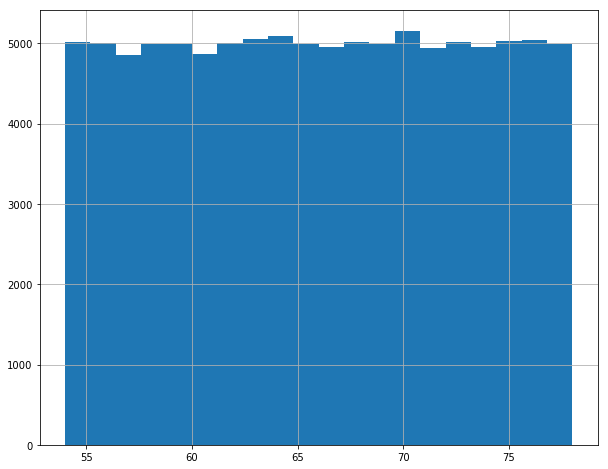

In [10]:
N = 100000 # measure height of 1000 simulated human beings
heights = []
for exp in range(N):
    h = random.uniform(54.0, 78.0) # we generate simulated people with a uniform height from 54 inches to 78 inches
    heights.append(h)
    
plt.figure(figsize=(10,8))
plt.hist(heights, bins=20)
plt.grid()

This is again a  uniform distribution, we expect to see about 500 people out of our 10,000 people in each of the 20 bins.

But, this is not what we would really see if we measured the heights of 10,000 people.  We would instead see something like this:

(array([  1.00000000e+00,   6.00000000e+00,   2.00000000e+01,
          4.80000000e+01,   1.35000000e+02,   3.30000000e+02,
          6.17000000e+02,   9.85000000e+02,   1.34400000e+03,
          1.54900000e+03,   1.59800000e+03,   1.29600000e+03,
          9.48000000e+02,   5.93000000e+02,   3.22000000e+02,
          1.32000000e+02,   5.30000000e+01,   1.90000000e+01,
          2.00000000e+00,   0.00000000e+00]),
 array([ 54. ,  55.2,  56.4,  57.6,  58.8,  60. ,  61.2,  62.4,  63.6,
         64.8,  66. ,  67.2,  68.4,  69.6,  70.8,  72. ,  73.2,  74.4,
         75.6,  76.8,  78. ]),
 <a list of 20 Patch objects>)

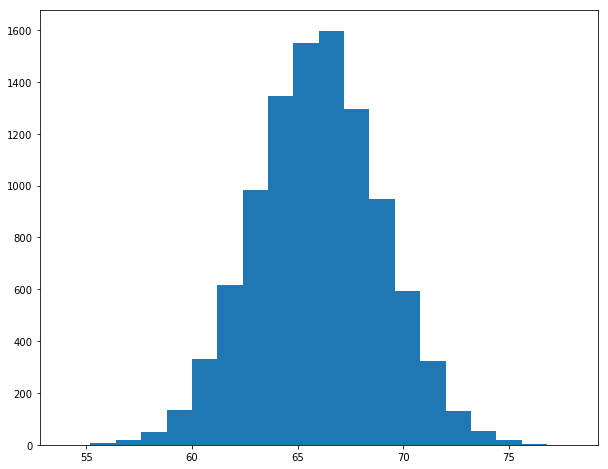

In [11]:
N = 10000 # measure height of 1000 simulated human beings
heights = []
for exp in range(N):
    h = random.normalvariate(66.0, 3.0) # we generate simulated people with a normally distributed height, mean = 5'6" std=3"
    heights.append(h)
    
plt.figure(figsize=(10,8))
plt.hist(heights, bins=20, range=(54.0, 78.0))


This is a normally distributed outcome.  Here people are much more likely to be close to the average height.  In fact in
a normal distribution, we expect around $2/3$ of the people to be within 1 standard deviation of the mean value, which means
$2/3$ of the people we measure will be between 63in (5'3") and 69in (5'9").  We also expect almost everyone (about 96%) to
be within 2 standard deviations from the average, between 60in (5'0") and 72in (6'0").  If you count up the numbers of
the samples in the bins below 60 and above 72 you should see that this is about correct.


**Side Note: Why are Normal Distributions so Common**

A curious student who hasn't run across this before in a stats class may wonder: why are normal distributions seen so commonly
in natural processes?  What explanation is there about how random events happen that explains the ubiquitious occurrances
we see of normally distributed stochastic processes?

The answer to this is known as the central limit theorm, which is a very important insight into the nature of repeated processes with some random component to them.  It basically states that, if you sum many random processes, the sum will end up being
normally distributed.

For example, we can demonstrate this very easily.  We will simulate the occurrence of many events that have a uniform
equally probable outcome, as we did just a moment ago.  To demonstrate the central limit idea, we will create N random
uniform events, then sum up those events.  For example, if we roll 10 random fair dice (e.g. they have 
a uniform probability of any pip coming up), the sum could be 10, if all 10 dice rolled a 1.  The sum could be 60, if
they all rolled a 6.  And the sum can be any number in between 10 and 60.  But, do you think the sum will be uniformly
distributed?  (Hint, how likely is it to roll all 1's or all 6's in 10 rolls).

(array([  0.00000000e+00,   1.50000000e+01,   2.49000000e+02,
          1.33900000e+03,   3.03900000e+03,   3.32200000e+03,
          1.65900000e+03,   3.48000000e+02,   2.80000000e+01,
          1.00000000e+00]),
 array([ 10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.]),
 <a list of 10 Patch objects>)

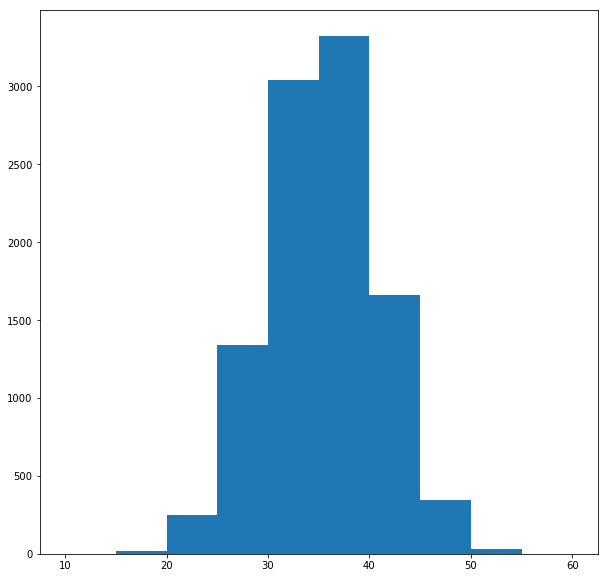

In [12]:
def sum_dice_rolls(num_rolls):
    """Sum num_rolls rolls of a dice.  The dice is fair (each pip can come up with equal probability))."""
    sum = 0
    for exp in range(num_rolls):
        sum += random.randint(1, 6)
    return sum

N = 10000
num_rolls = 10
summed_dice_rolls = []
for exp in range(N):
    summed_dice_rolls.append(sum_dice_rolls(num_rolls))
    
plt.figure(figsize=(10,10))
plt.hist(summed_dice_rolls, bins=10, range=(10,60))

You may get 1 or 20 10's, and likewise 1 or 2 60's, but usually not any more than that.  You will get lots of 34's, 35's and
36's when rolling 10 dice, because there are a large number of ways that you can combine dice rolls to end up with those 
sums.  Therefore the distribution of the sum you get is **not** uniformly distributed.  And, in fact, if you perform this
experiment long enough, you will see that the distribution forms a good approximation of the normal distribution.

Here is the same thing, but we sum 10 uniformly distributed continuous values instead.  This will more easily show, for larger
numbers of N experiments, how the sume in the limit (as the number of experiments grows towards infinity) tends towards
the normal distribution.

(array([    4.,     5.,    28.,    63.,   133.,   281.,   526.,   894.,
         1250.,  1486.,  1533.,  1351.,  1045.,   748.,   360.,   187.,
           66.,    30.,     7.,     3.]),
 array([ 38.42134428,  39.55080218,  40.68026007,  41.80971797,
         42.93917587,  44.06863376,  45.19809166,  46.32754955,
         47.45700745,  48.58646534,  49.71592324,  50.84538113,
         51.97483903,  53.10429692,  54.23375482,  55.36321271,
         56.49267061,  57.62212851,  58.7515864 ,  59.8810443 ,  61.01050219]),
 <a list of 20 Patch objects>)

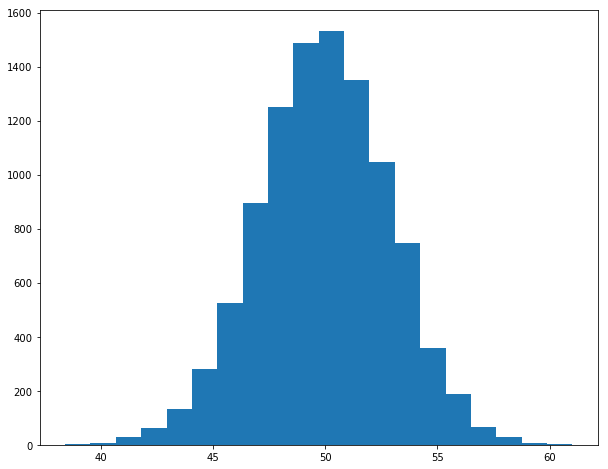

In [13]:
def sum_uniform_draws(num_samples):
    """Sum num_samples uniformly drawn samples (equally probably outcomes).  We create random uniform floating
    point numbers using the standard python random functions."""
    sum = 0.0
    for exp in range(num_samples):
        sum += random.random()
    return sum

N = 10000
num_samples = 100
summed_draws = []
for exp in range(N):
    summed_draws.append(sum_uniform_draws(num_samples))
    
plt.figure(figsize=(10,8))
plt.hist(summed_draws, bins=20)

** Theoretical Probability Distributions***

In the lecture notebook, we introduced you to the theoretical probability density function (PDF) for the normal
distribution.  Some people have asked how a theoretical probability density function relates to or is 
used to generate random samples that follow that distribution.  As I just mentioned, the theoretical 
probability distribution tells us the expected size for any given outcome we should expect to see if we 
increase the number of samples (or experiments) to infinity. So the theoretical PDF tells us what the
distribution of outcomes will look like in the limit as we continue to perform an infinite number
of experiments.  Here was the normal distribution PDF equation, and the visualization we had in our 
lecture notebook once again:

$g(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}} $

In [14]:
def g(x, mu=0.0, sigma=1.0):
    """The Gaussian Probability Distribution Function (PDF).  Given an array
    of values, compute the Gaussian PDF function on each value and return
    the resulting values as a new array.  You can specify a different mean
    of the distribution using the mu parameter, and a different standard
    deviation using the sigma input parameter.
    """
    return 1 / (sigma * (2. * np.pi)**0.5) * np.exp(- (x - mu)**2. / (2. * sigma**2.))

x = np.linspace(-5., 5., 20)
print( x ) 
print( g(x) ) 

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[  1.48671951e-06   1.79869558e-05   1.64961696e-04   1.14684672e-03
   6.04400005e-03   2.41457312e-02   7.31228458e-02   1.67865955e-01
   2.92125176e-01   3.85364911e-01   3.85364911e-01   2.92125176e-01
   1.67865955e-01   7.31228458e-02   2.41457312e-02   6.04400005e-03
   1.14684672e-03   1.64961696e-04   1.79869558e-05   1.48671951e-06]


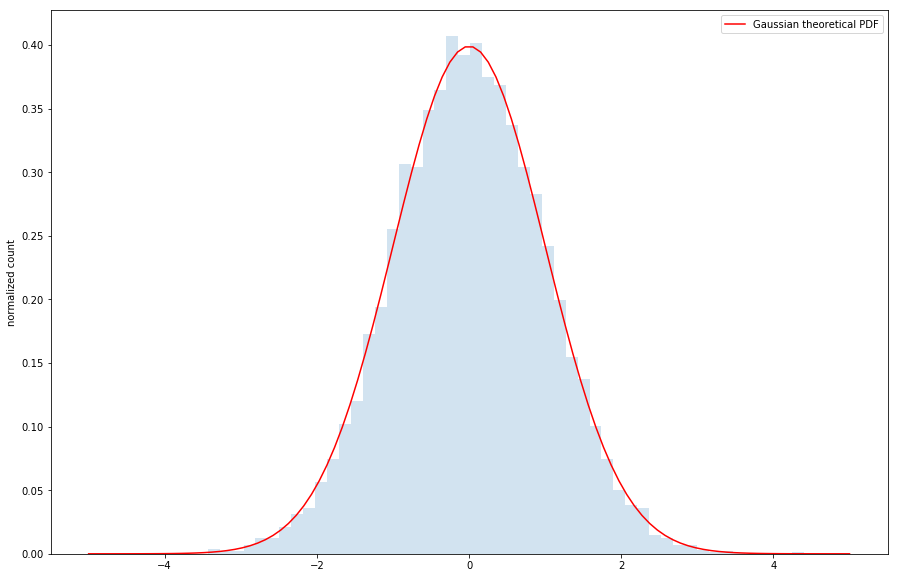

In [15]:
mu = 0.0
sigma = 1.0
plt.figure(figsize=(15,10))

# plot a histogram of randomly drawn samples from the Gaussian distribution
d = np.random.normal(mu, sigma, size=10000)
plt.hist(d, bins=50, normed=True, fill=True, alpha=0.2)

# plot the true Gaussian theoretical PDF
x = np.linspace(-5., 5., 100)
plt.plot(x, g(x), 'r-', label='Gaussian theoretical PDF')
plt.ylabel('normalized count')
plt.legend()

There are two points I wanted to explain here.  For one, the astute observer might have noticed that our bars are no longer
absolute counts of the number of times an event occurred that fell within the bin of our histogram.  Instead, we have done
what is called normalizing the bins (by passing normed=True to the hist() plotting function).  When you normalize the
bins of a histogram, you basically divide the count of the outcomes that fell into that bin by the total number of
outcomes/experiments you generated.  The results is a number between 0 and 1, and can be interpreted as the probability
that an outcome will fall into the given bin.  Since each normalized bin is the ratio of the outcomes in that bin
divided by the total number of outcomes/experiments $\textit{bin_count} / N$, we know that the sum over all the bins must be
equal to 1.0 (i.e. all of the outcomes fell into 1 of the bins, if we sum up all of the bins, we should get the total
number of outcomes we generated, which is equal to the total number of experiments N we performed).

This brings me to my second point, the theoretical PDF is expressed in terms of the probability or ratio of outcomes we
expect to occur at any given point in our continuous range of possible outcomes.  Therefore, the sum of the area 
under the theoretical PDF curve (for any PDF) must be equal to 1.0. 

This is actually obvious, once you understand the definitions of probabilities and a theoretical probability density
function.  A probability in statistics is defined to range from 0.0 (never occurs) to 1.0 (always occurs), with
intermediate values representing more or less likelihood of an outcome occurring (a coin toss has 0.5 probability of
tossing a head, it is equally likely that the toss will be a Head, or not a Head).  For any experiment there
are some number or some range of possible outcomes.  For example, for a dice throw, there are 6 discrete outcomes.
The sum of the probabilities over all of the possible outcomes must be equal to 1.0 ($\sum_1^6 \frac{1}{6}$).  This follows from the definition, 
if any given outcome has probability $p$, then the sum over all of the possible outcomes has to be

$\sum_o p_o = 1.0$

If you understand the definition, and what we mean by an experiment, and a possible outcome, then you should be able to
see why the PDF sums up to 1.0.  The PDF for our normal distribution is a little more complicated, in that the outcomes
are over a range of continuous values.  But the idea is still the same.  Over the range of all possible outcomes, some
outcome must occur every time we run a trial/experiment.  Therefore, the PDF over the whole range of possible outcomes
has to sum up to 1.0.  This also implies that the integral of our gaussian function $g(x)$ is equal to 1.0:

$\int_{-\infty}^{\infty} g(x) = 1.0$
